## MidTerm Exam

### Pregunta 1 : Regresión Logística

Basado en el enunciado del libro:

Vamos a predecir si un un auto dado tiene alto o bajo rendimiento de gasolina basado en el dataset **Auto**

In [1]:
import pandas as pd
import numpy as np

### Cargando data

Este archivo csv fue proporcionado originalmente por Gareth James.
Se puede encontrar en http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

In [2]:
df = pd.read_csv("Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Preprocesando la data

Como siempre he venido haciendo tenemos que ver si es que hay los valores NaN o Null en nuestro dataset, ya que en la vida real no siempre tenemos datos ordenados y bonitos por lo que no podemos tener esta mala práctica de defrente comenzar a operar con nuestro dataset.

In [3]:
print(df.isna().sum())
print("---")
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
---
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


Aún asi podemos tener valores no conocidos puestos de una manera distinta por ejemplo podemos poner un valor desconocido con la etiqueta **Not found** o **Unknow**, pero debido a la práctica constante es fácil saber si existen etiquetas así por lo que vamos a analizar el tipo de columna que tenemos... por ejemplo:

In [4]:
df.mpg # es de tipo float (dtype: float64)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

In [5]:
# observamos todos los tipos

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Y logramos dar con que horsepower es de tipo object por lo que es muy probablee que tenga valores desconocidos.

In [6]:
# Provocamos el error para ver que valor o string es considerado como desconocido:
df["horsepower"].astype(float)

ValueError: could not convert string to float: '?'

Y listo! logramos dar con el string "?" . Queda calcular cuantos de estos valores tenemos

In [7]:
# Tan solo 5 valores

df[df["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [8]:
# reemplazamos con la media de los valores conocidos 

horsepower_mean = (df.horsepower[df["horsepower"] != "?"]).astype(float).mean()

df.horsepower[df["horsepower"] == "?"] = horsepower_mean


/home/nicerova/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
df.iloc[[32,126,330,336,354]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,104.469,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,104.469,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,104.469,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,104.469,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,104.469,2320,15.8,81,2,renault 18i


In [10]:
# ahora si podemos convertirlo en float

df["horsepower"] = df.horsepower.astype(float)

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Ahora que vemos que tenemos los datos limpios vamos a proceder a mirar que es lo que tenemos en nuestro dataset.

### Analizando el marco de dato

Otra buena práctica es analizar obviamente nuestro dataset no podemos simplemente sacar la media y obtener algun valor continuo cuando tan solo se permite valores discretos (1,2,3..).

In [12]:
df.columns.to_list()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

Tenemos entonces en nuestro dataset las siguientes columnas, que haciendo una busqueda en internet sobre el significado de estos podemos encontrar que:

* mpg (continous): Miles Per Gallon o en español millas por galeon es decir el recorrido por galeon (en millas) de nuestro carro.


* cylinders (multi-valued discrete): la cantidad de cilindros que tiene nuestro carro. En general, un motor con más cilindros produce más potencia, mientras que un motor con menos cilindros obtiene una mejor economía de combustible.


* displacement (continuous): El desplazamiento del motor es el volumen barrido de todos los pistones dentro de los cilindros de un motor alternativo en un solo movimiento desde el punto muerto superior (TDC) al punto muerto inferior (BDC). Se especifica comúnmente en pulgadas cúbicas.


* hoursepower (continuous): la potencia del motor del carro en caballos de fuerza


* weight (continuous): peso del carro (al parecer en kg)


* acceleration (continuous): la aceleración de nuestro coche, también podemos decir que es el tiempo en segundos que nuestro coche alcanza una velocidad de 60mph desde el reposo.


* year (multi-valued discrete): año de fabricación, al parecer de los años 1970 hacia adelante.


* origin (multi-valued discrete): Aqui discerniendo por el modelo del carro (gracias a la columna name) podemos decir que..

    * 1: USA
    * 2: Europa
    * 3: Japon


* name (string):  nombre del carro

### Creando variable binaria mpg01

A partir de la media de la columna mpg vamos a filtrar de esta manera:

   * Si es mayor que la media será 1
   * Caso contrario sera 0

In [13]:
mpg_mean = df.mean()[0]
print(mpg_mean)

df["mpg01"] = (df["mpg"]>mpg_mean).astype(int)
df.iloc[[12,14]] # ilustramos que si nos salio bien

23.51586901763224


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo,0
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii,1


### Explorando la data gráficamente

Se investigará la asociación entre mpg01 y las otras variables.

Se respondrá lo siguiente :¿Cuál de las otras características parece más útil para predecir mpg01?.

In [14]:
import matplotlib.pyplot as plt

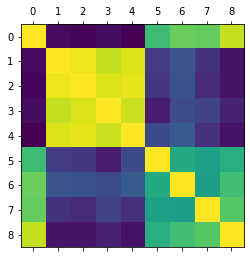

In [15]:
%matplotlib inline 

corr = df.corr()

plt.matshow(corr)


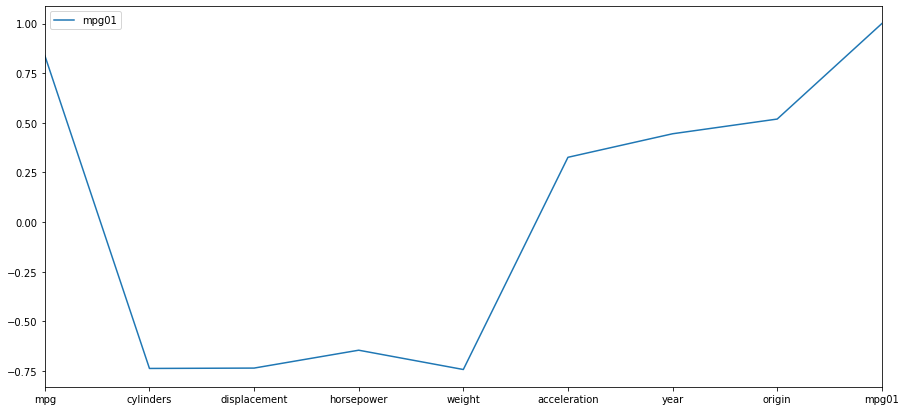

In [16]:
# Especificamente para mpg01
corr[["mpg01"]].plot(figsize=(15,7))

Observamos como la correlación más grande que se tiene de mpg01 con las demás columnas es de:
   * cylinders, displacement, horsepower, weight ( negativo pero cercano a uno).

**Nota**: Acceleration, year y origin no presentan tan grande la correlación.

Despues de meditar, he considerado que el problema de agregar horsepower a nuestro modelo es que ésta columna en un principio contaba con valores string (*'?'*) que obviamente puede traer deficiencia en nuestro modelo puesto que fueron reemplazados por una media y no por un valor real.

In [17]:
# Probaremos con ambas (con/sin horsepower) y guardaremos para hacer los calculos después.

columns_1 = ["cylinders","displacement","horsepower", "weight"]
columns_2 = ["cylinders","displacement","weight"]

(array([ 27.,  95., 120.,  49.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

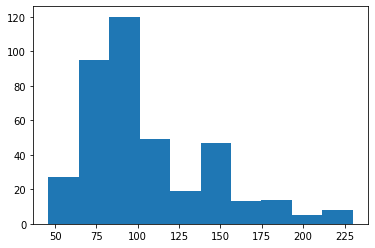

In [18]:
plt.hist(df.horsepower) # también notamos que los valores de horsepower estan movidas
                        # a la izquierda o sesgadas por la derecha

Por otro lado podemos asegurarnos y ver la correlación entre todos los 'features' que tiene nuestro marco de datos asi logramos afirmar o negar lo que ya habiamos visto con la matriz de correlación...

In [19]:
import seaborn as sns

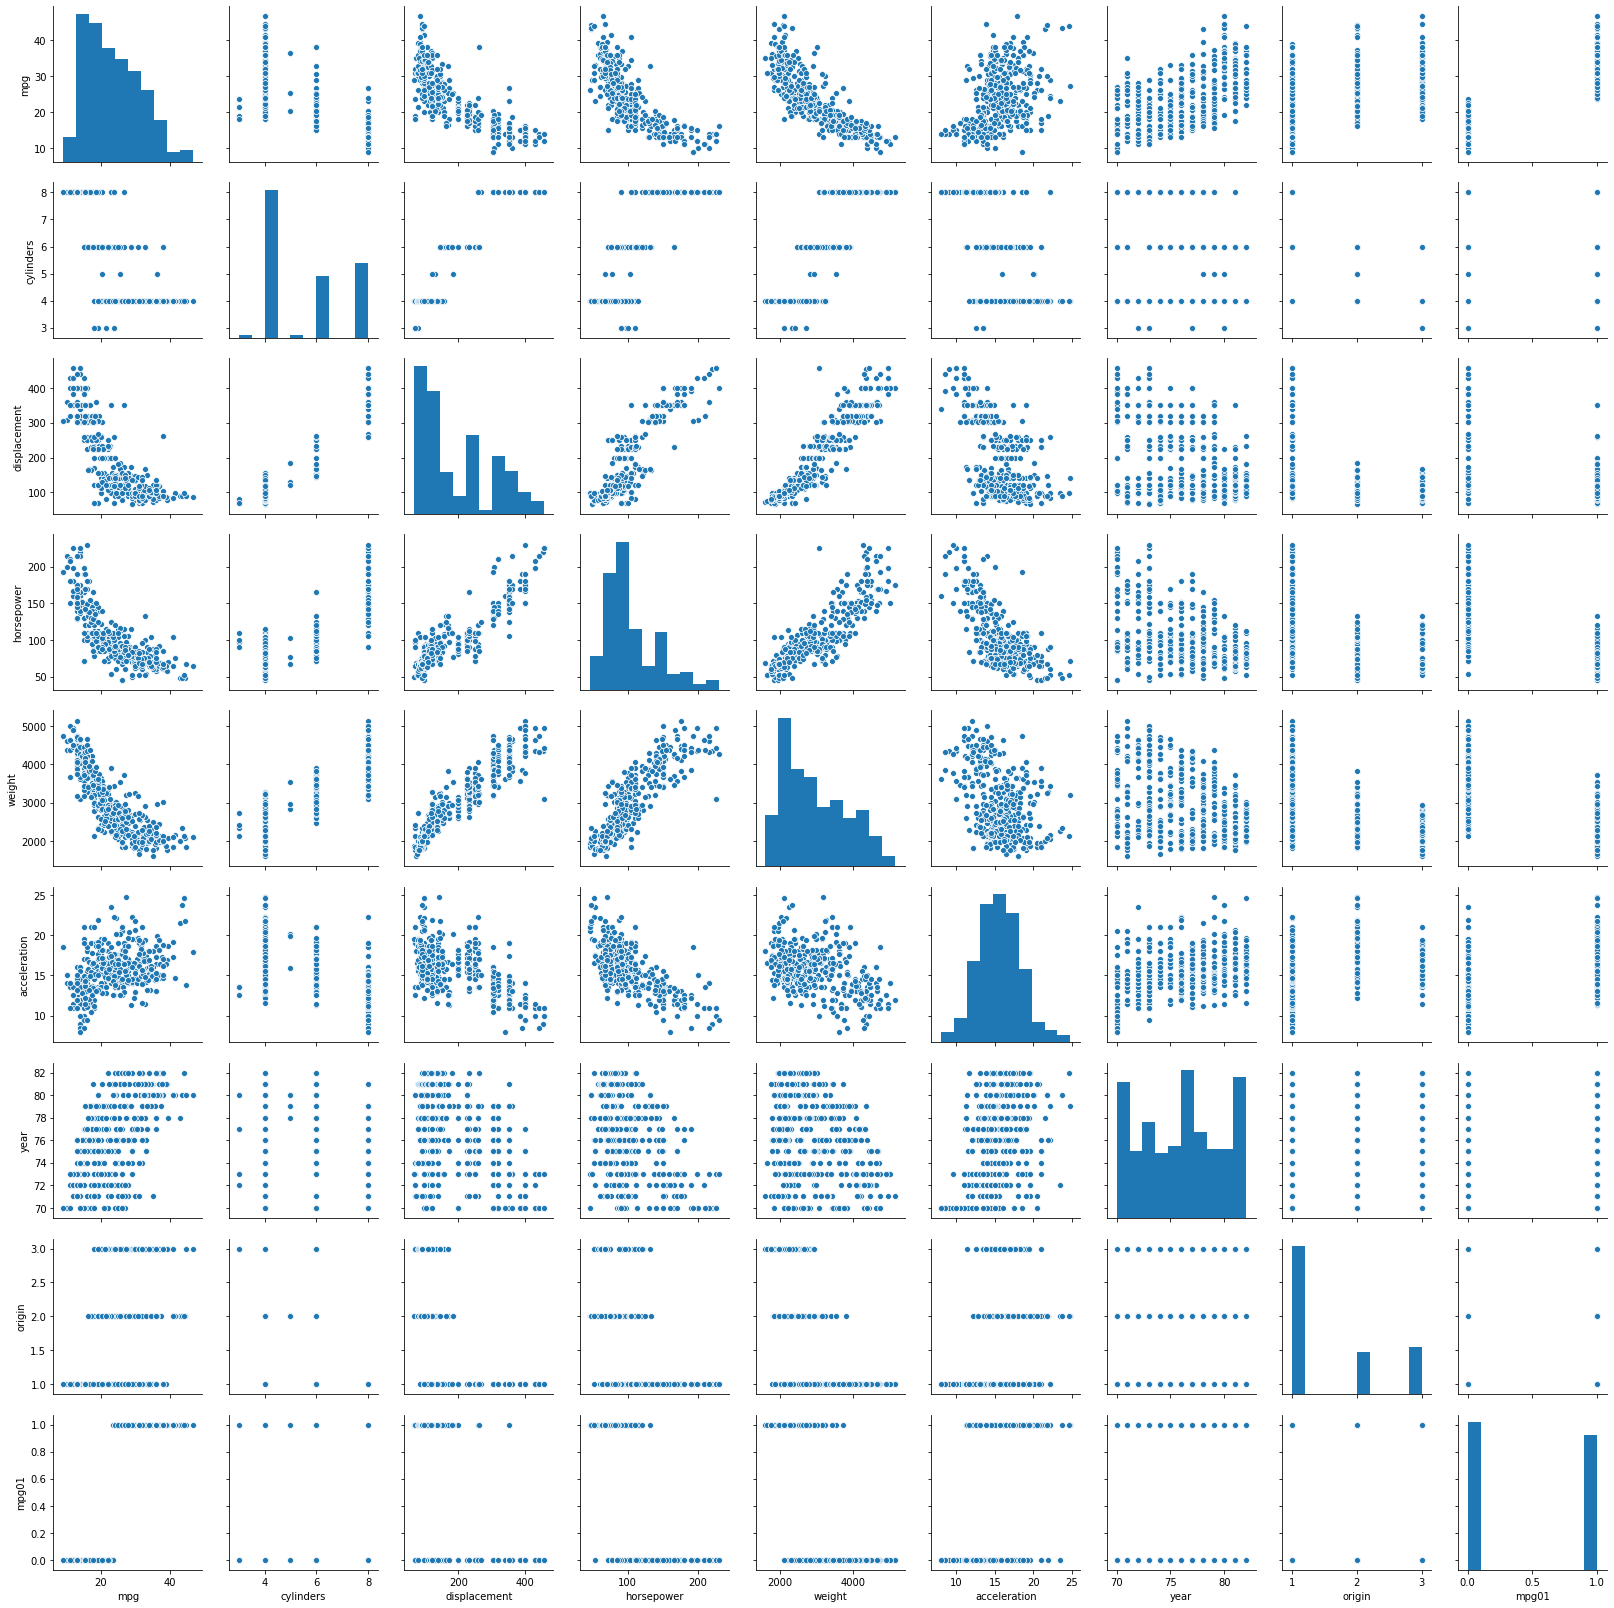

In [21]:
sns.pairplot(df)

Por lo que se mantiene la correlación entre las variables ya mencionadas con mpg01 que son altas .

### Separamos la data en train y test

In [22]:
from sklearn.model_selection import train_test_split

In [38]:
X_1 = df[columns_1] # con horsepower
X_2 = df[columns_2] # sin horsepower

Y = df["mpg01"]

In [39]:
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(X_1,Y,
                                                    test_size = 0.3)

train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(X_2,Y,
                                                    test_size = 0.3)

### Regresión logística

Crearemos un modelo de regresión logística para predecir 0 o 1 de la columna mpg01 con las columnas más correlacionadas con mpg01 que ya hemos obtenido

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logit_model_1 = LogisticRegression(solver='lbfgs')
logit_model_2 = LogisticRegression(solver='lbfgs')

logit_model_1.fit(train_x_1,train_y_1)
logit_model_2.fit(train_x_2,train_y_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logit_model_1.score(test_x_1,test_y_1)

0.825

In [43]:
logit_model_2.score(test_x_2,test_y_2)

0.9083333333333333

### Conclusión

Concluimos que nuestro análisis de no considerar horsepower causa un impacto positivo en el modelo ya que aumenta el score por lo que se tiene un test error de:

In [44]:
1-logit_model_2.score(test_x_2,test_y_2)

0.09166666666666667

También pomodemos usar la matriz de confusión para fiabilidad de nuestro modelo.

In [45]:
pd.crosstab(logit_model_2.predict(test_x_2),test_y_2,colnames=["real"],rownames=["prediccion"])

real,0,1
prediccion,,
0,49,4
1,7,60


In [46]:
(7+4)/(49+7+4+60)

0.09166666666666666